In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


Load Dataset

In [26]:
df = pd.read_csv('Heart_Disease_Prediction.csv')
df.sample()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
161,62,0,4,150,244,0,0,154,1,1.4,2,0,3,Presence


In [11]:
##df = df.drop(['No'], axis=1)

In [27]:
df.sample()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
112,60,0,4,158,305,0,2,161,0,0.0,1,0,3,Presence


In [13]:
##df = df.drop(['Kecamatan'], axis=1)

In [14]:
df.sample()

,DesilKesejahteraan,PrioritasVerval,JenisKelamin,HubungaKepalaKeluarga,Pekerjaan,Usia2023,PenerimaSEMBAKO
19518,4,Normal,Perempuan,Istri/Suami,Pedagang,48,Tidak


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [29]:
numerical = []
catgcols =[]

for col in df.columns:
    if df[col].dtype=="int64":
        numerical.append(col)
    else:
        catgcols.append(col)

for col in df.columns:
    if col in numerical:
        df[col].fillna(df[col].median(),inplace=True)
    else:
        df[col].fillna(df[col].mode()[0],inplace=True)

In [30]:
numerical

['Age',
 'Sex',
 'Chest pain type',
 'BP',
 'Cholesterol',
 'FBS over 120',
 'EKG results',
 'Max HR',
 'Exercise angina',
 'Slope of ST',
 'Number of vessels fluro',
 'Thallium']

In [31]:
catgcols

['ST depression', 'Heart Disease']

In [8]:
df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [22]:
df['target'] = df['Label'].replace(['Tidak\t'],'Tidak')

In [9]:
df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [10]:
ind_col = [col for col in df.columns if col != 'target']
dep_col = 'target'

In [11]:
df[dep_col].value_counts()

target
1    526
0    499
Name: count, dtype: int64

#Transformasi Dataset

In [12]:
le = LabelEncoder()

for col in catgcols:
    df[col] = le.fit_transform(df[col])


In [13]:
df['target'] = le.fit_transform(df['target'])

In [14]:
x = df[ind_col] #feature
y = df[dep_col] #label

In [15]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,10,2,2,3,0
1,53,1,0,140,203,1,0,155,1,29,0,0,3,0
2,70,1,0,145,174,0,1,125,1,25,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,18,1,3,2,0


In [16]:
df.to_csv('datajantungbaru.csv',index=False)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,10,2,2,3,0
1,53,1,0,140,203,1,0,155,1,29,0,0,3,0
2,70,1,0,145,174,0,1,125,1,25,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,18,1,3,2,0


In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dtc = DecisionTreeClassifier(
 
    ccp_alpha=0.0, class_weight=None, criterion='entropy',
    max_depth=4, max_features=None, max_leaf_nodes=None,
    min_impurity_decrease=0.0, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0,
    random_state=42, splitter='best'
)

model = dtc.fit(x_train, y_train)


dtc_acc = accuracy_score(y_test, dtc.predict(x_test,))

print(f"Akurasi Data Training = {accuracy_score(y_train, dtc.predict(x_train))}")
print(f"Akurasi Data Testing = {dtc_acc} \n")

print(f"Confusion matrix = \n{confusion_matrix(y_test, dtc.predict(x_test))} \n")

confusion = confusion_matrix(y_test, dtc.predict(x_test))
tn, fp, fn, tp = confusion.ravel()
print(f"Hasil Klasifikasi :  \n {classification_report(y_test, dtc.predict(x_test))} \n")



Akurasi Data Training = 0.8597560975609756
Akurasi Data Testing = 0.8731707317073171 

Confusion matrix = 
[[ 78  20]
 [  6 101]] 

Hasil Klasifikasi :  
               precision    recall  f1-score   support

           0       0.93      0.80      0.86        98
           1       0.83      0.94      0.89       107

    accuracy                           0.87       205
   macro avg       0.88      0.87      0.87       205
weighted avg       0.88      0.87      0.87       205
 



#Simulasi Model

In [23]:
input_data = (58,0,0,100,248,0,0,122,0,10,1,0,2)

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshape)
print(prediction)

if (prediction[0]==0):
    print("Tidak terkena Penyakit Jantung")
else :
    print("Terduga Penyakit Jantung")

[1]
Terduga Penyakit Jantung


c:\Users\Acer\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


visualisasi pohon keputusan 

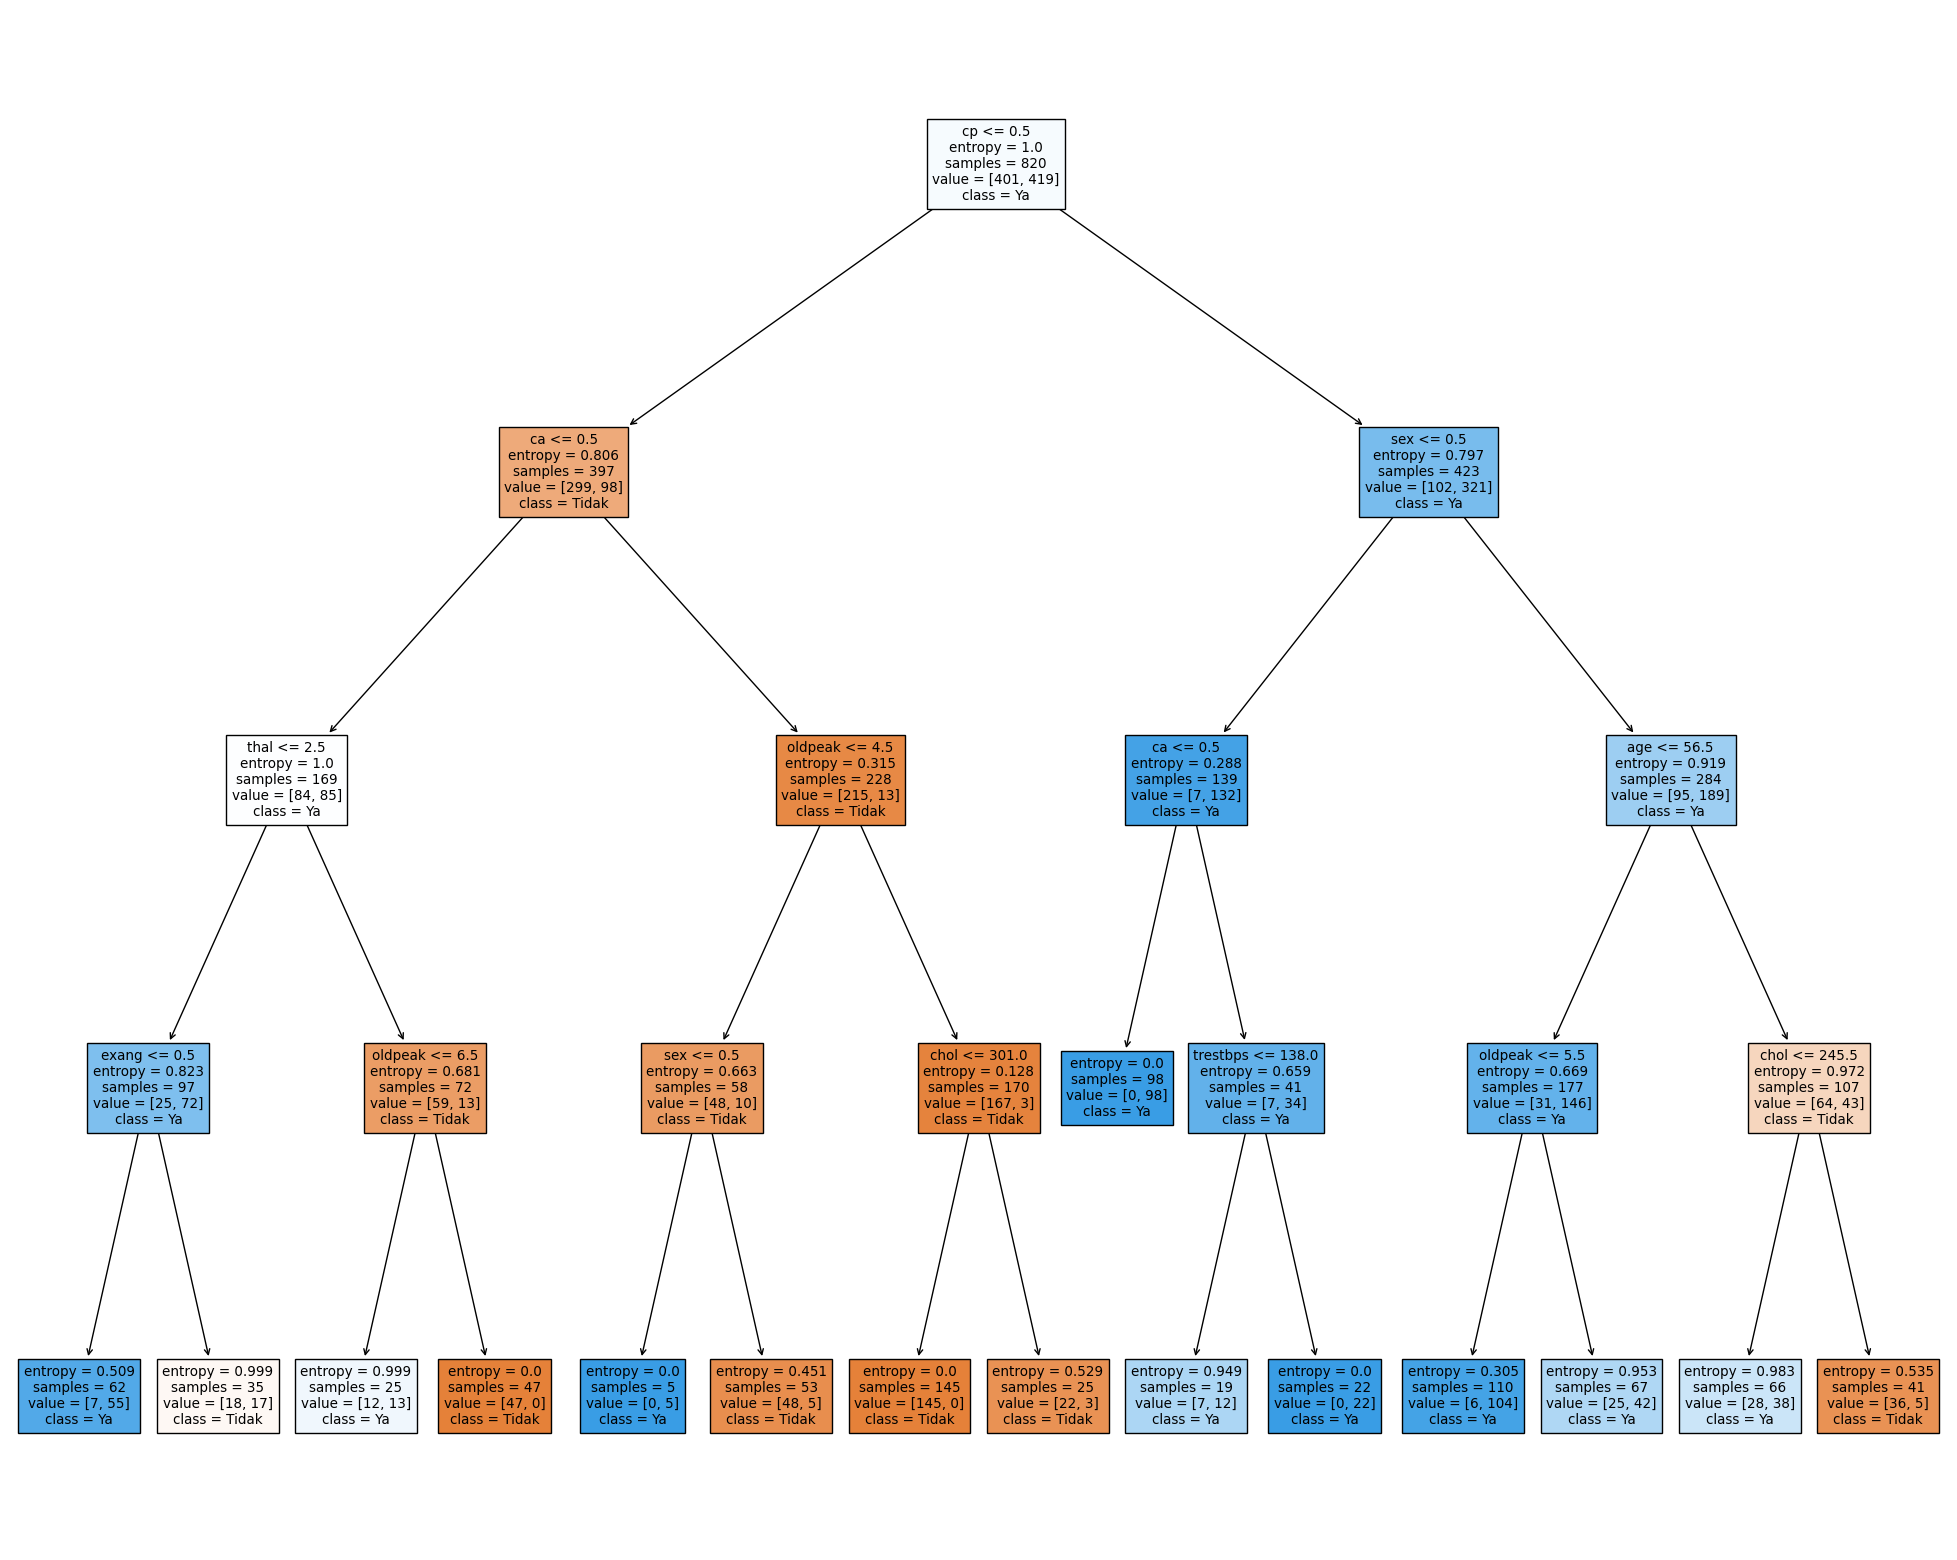

In [24]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   feature_names=ind_col,
                   class_names=['Tidak','Ya'],
                   filled=True)